<a href="https://colab.research.google.com/github/jdanifalcon/match-rstudio-colab/blob/main/rbasicosig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Esta es la extensión de colab que nos permite ejecutar R
%load_ext rpy2.ipython

**Librerías para manejo de archivos de mapas vectoriales y raster**

rgdal: nos permite leer archivos shape.
raster: nos permite leer archivos raster.

In [2]:
%%R
install.packages("rgdal")
install.packages("raster")
install.packages("rgeos")
library(rgdal)
library(raster)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘sp’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/sp_1.4-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1049195 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

**Descarga de los datos a tu drive**
- gdown nos ayuda a descargar los datos públicos de mi drive hacia el tuyo.

In [3]:
%%R
#Archivo INEGI_Entidad_.shx
system("gdown --id 1QwuDgUbqEbm5hbJhzyLdREZxWQ3DIf62")#https://drive.google.com/file/d/1QwuDgUbqEbm5hbJhzyLdREZxWQ3DIf62/view?usp=sharing
#Archivo INEGI_Entidad_.shp
system("gdown --id 1CgPFApI2gKhZ91sUAtlJ37qXvVT5oA47")#https://drive.google.com/file/d/1CgPFApI2gKhZ91sUAtlJ37qXvVT5oA47/view?usp=sharing
#Archivo INEGI_Entidad_.dbf
system("gdown --id 12Dv6PpmUKkqmsNm6Q4Q93ekJM4wzWasT")#https://drive.google.com/file/d/12Dv6PpmUKkqmsNm6Q4Q93ekJM4wzWasT/view?usp=sharing


**Usando GDAL para leer un shape**



*   La función readOGR leé el shape y carga la base de datos en un objeto.
*   La librería rgdal sobrecarga la funcion "plot", para que pueda graficar los shapes.



OGR data source with driver: ESRI Shapefile 
Source: "/content/INEGI_Entidad_.shp", layer: "INEGI_Entidad_"
with 382 features
It has 2 fields


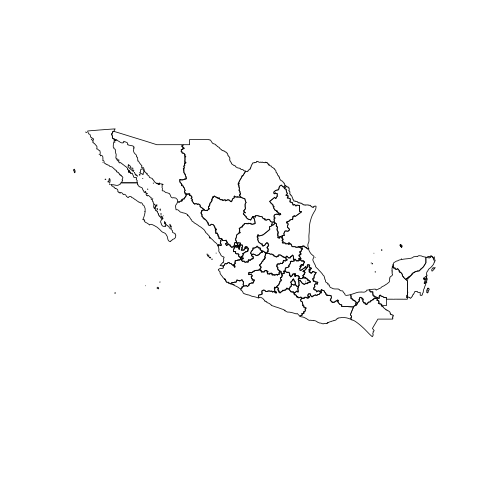

In [4]:
%%R
#Cargamos el shape
shapeMex <- readOGR("./INEGI_Entidad_.shp")
#Graficamos el shape
plot(shapeMex)

**Ver que campos contiene la base de datos y extraer un submapa**
- Vemos los nombre de campos

- Vemos los valores "únicos" en un campo

- Extraemos una parte del mapa filtrando la base de datos.

[1] "ID"     "NOMBRE"
 [1] "Yucatán"                         "Nayarit"                        
 [3] "Nuevo León"                      "Oaxaca"                         
 [5] "Puebla"                          "Sonora"                         
 [7] "Querétaro"                       "Quintana Roo"                   
 [9] "Baja California Sur"             "Tabasco"                        
[11] "Tamaulipas"                      "Tlaxcala"                       
[13] "Veracruz de Ignacio de la Llave" "Sinaloa"                        
[15] "Baja California"                 "San Luis Potosí"                
[17] "Zacatecas"                       "Ciudad de México"               
[19] "Guerrero"                        "Hidalgo"                        
[21] "Jalisco"                         "Durango"                        
[23] "Guanajuato"                      "Morelos"                        
[25] "México"                          "Michoacán de Ocampo"            
[27] "Aguascalientes"        

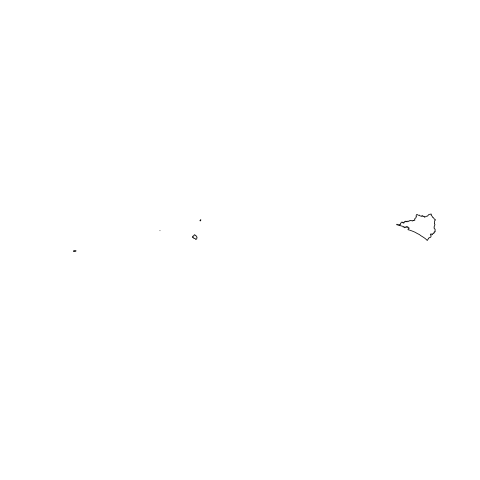

In [5]:
%%R
#Vemos como se llaman los campos
print(names(shapeMex))
#Con lo de arriba ya vimos que uno de los campos es "NOMBRE"
print(unique(shapeMex$NOMBRE))
#Con lo de arriba vimos que un elemento es "Colima"
#Extraemos el subshape
shapeColima=shapeMex[shapeMex$NOMBRE=="Colima",]
#Graficamos el mapa de colima extraido
plot(shapeColima)
print(shapeColima)

**Recortar una parte del shape**

- El mapa de colima tiene algunas islas que no son de interés para la tarea. Las vamos a recortar haciendo un rectangulo alrededor de la parte continental.

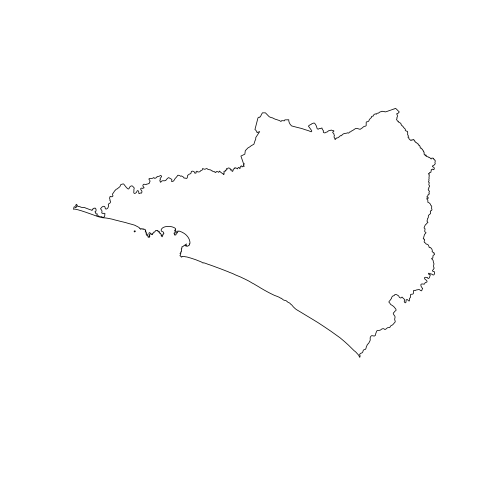

In [6]:
%%R
# print(shapeColima) #Sacamos los datos de extensión de shape
#Hacemos un rectangulo mas o menos que cubra la parte continental de Colima
pol=extent(cbind(c(-110,-103.4863),c(18.33886, 19.51252)))
#Recortamos la intersección entre el rectangulo y 
shapeTerraColima=crop(shapeColima,pol)
plot(shapeTerraColima)

**Guardamos el shape**

-Almacenamos el shape que acabamos de recorta


In [7]:
%%R

writeOGR(obj=shapeTerraColima,layer="./colima",dsn=".",driver="ESRI Shapefile", overwrite_layer=TRUE)
